<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-19/blob/main/Actividad_Semana4_A01794118_%26_A01374957.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad  Semana 4 - PCA
## Materia: Ciencia de datos
## Impartida por: Doctor Jobish Vallikavungal Devassia
### Alumno: Jose Santiago Rueda Antonio & Roberto Santiago
### Matrícula: A01794118 - A01374957
*11/Octubre/2022*

**Data description:** [https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt](https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt)

## Paso 1: 
- Determine el número mínimo de componentes principales que representan la - mayor parte de la variación en sus datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(path)
df.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.shape

(30000, 25)

### Revisamos la correlación


In [ ]:
df.corr().iloc[:,9:]

,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,-0.002712,-0.021893,-0.020121,0.019576,0.018138,0.024527,0.040464,0.016862,0.016836,0.009647,0.008445,0.039130,0.007806,0.000651,0.002997,-0.014049
X1,-0.267390,-0.249485,-0.235185,0.285538,0.278410,0.283343,0.294063,0.295614,0.290475,0.195307,0.178431,0.210143,0.203256,0.217177,0.219585,-0.153506
X2,-0.060055,-0.055002,-0.043997,-0.033832,-0.031348,-0.024737,-0.022029,-0.017169,-0.016893,-0.000179,-0.001427,-0.008581,-0.002267,-0.001688,-0.002781,-0.039919
X3,0.108867,0.097542,0.082296,0.023582,0.018742,0.012999,-0.000427,-0.007545,-0.009108,-0.037466,-0.030024,-0.039945,-0.038274,-0.040338,-0.037181,0.028136
X4,0.033002,0.035529,0.034331,-0.023556,-0.021666,-0.024988,-0.023399,-0.025465,-0.021311,-0.005913,-0.008130,-0.003515,-0.012651,-0.001205,-0.006676,-0.024318
X5,-0.049730,-0.053761,-0.048751,0.056357,0.054357,0.053783,0.051443,0.049401,0.047706,0.025978,0.021794,0.029223,0.021357,0.022790,0.019514,0.013840
X6,0.538867,0.509370,0.474575,0.187059,0.189865,0.179787,0.179156,0.180697,0.177062,-0.079246,-0.070112,-0.070467,-0.063968,-0.058145,-0.058668,0.324753
X7,0.662109,0.622841,0.575473,0.234840,0.235224,0.224116,0.222257,0.221375,0.219377,-0.080697,-0.059002,-0.055825,-0.046856,-0.037037,-0.036498,0.263570
X8,0.777115,0.686481,0.632342,0.208741,0.237551,0.227748,0.227494,0.225465,0.222537,0.001225,-0.066787,-0.053270,-0.046003,-0.035781,-0.035836,0.235573
X9,1.000000,0.820038,0.716640,0.202887,0.225899,0.245064,0.246054,0.243007,0.239195,-0.009326,-0.001923,-0.069180,-0.043427,-0.033596,-0.026531,0.216488


### Los componentes principales son:
1.   ***X12 - bill_2005_09***
2.   ***X13 - bill_2005_08***
3.   ***X14 - bill_2005_07***
4.   ***X15 - bill_2005_06***
5.   ***X16 - bill_2005_05***
6.   ***X17 - bill_2005_04***



In [ ]:
principales = df.drop(["ID","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X18","X19","X20","X21","X22","X23","Y"], axis=1)
principales

,X12,X13,X14,X15,X16,X17
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0


In [ ]:
# Nuevamente revisamos la correlación:
principales.corr()

,X12,X13,X14,X15,X16,X17
X12,1.000000,0.951480,0.892272,0.860264,0.829772,0.802641
X13,0.951480,1.000000,0.928321,0.892475,0.859776,0.831588
X14,0.892272,0.928321,1.000000,0.923968,0.883908,0.853317
X15,0.860264,0.892475,0.923968,1.000000,0.940141,0.900940
X16,0.829772,0.859776,0.883908,0.940141,1.000000,0.946194
X17,0.802641,0.831588,0.853317,0.900940,0.946194,1.000000


In [ ]:
# De acuerdo a los tutoriales del Dr Jobish, utilizamos normalización y PCA para tener datos estandarizados:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pcs = PCA()
pcs.fit(preprocessing.scale(principales.iloc[:, 0:6].dropna(axis=0)))

PCA()

In [ ]:
# Veamos la desviación estandar y las proporciónes de la varianza para 
#saber cuantos componentes necesitamos para llegar al 97% de info deseada:

pcsSummary_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de la varianza': pcs.explained_variance_ratio_,
                             'Proporción acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(3) 

,PC1,PC2,PC3,PC4,PC5,PC6
Desviación estándar,2.331,0.553,0.334,0.259,0.204,0.201
Proporción de la varianza,0.906,0.051,0.019,0.011,0.007,0.007
Proporción acumulada,0.906,0.957,0.975,0.986,0.993,1.000


Con la proporción acumulada observamos que con 3 componentes podemos obtener el 97.5% de la información.

## Paso 2:
- Interprete cada componente principal en términos de las variables originales

In [ ]:
# Vamos a crear un df para observar la contrubución de cada variable PCn a las variables originales:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=principales.iloc[:, 0:6].columns
                                )

val_absolutos=pd.DataFrame(data=pcsComponents_df.abs())

pcsComponents_df.iloc[:,:3]

,PC1,PC2,PC3
X12,0.400876,0.536466,-0.457362
X13,0.410555,0.428836,-0.115944
X14,0.412034,0.175539,0.622246
X15,0.414762,-0.180798,0.439714
X16,0.410292,-0.430113,-0.080318
X17,0.400754,-0.528966,-0.436334


In [ ]:
print(val_absolutos.iloc[:,:3],"\n")
print("Los 3 contribuidores más importantes para PC1 son\n",val_absolutos.PC1.nlargest(3),"\n")
print("Mayor contribuidor de PC1, X15, es el estado de cuenta en Junio 2005\n")
print("Menor contribuidor de PC1 es",val_absolutos.PC1.idxmin(),"que es el estado de cuenta en Abril 2005\n")

print("Los 3 contribuidores más importantes para PC2 son\n",val_absolutos.PC2.nlargest(3),"\n")
print("Mayor contribuidor de PC2, X12, es el estado de cuenta en Septiembre 2005\n")
print("Menor contribuidor de PC2 es",val_absolutos.PC2.idxmin(),"que es el estado de cuenta en Julio 2005\n")

print("Los 3 contribuidores más importantes para PC3 son\n",val_absolutos.PC3.nlargest(3),"\n")
print("Mayor contribuidor de PC3, X14, es el estado de cuenta en Julio 2005\n")
print("Menor contribuidor de PC3 es",val_absolutos.PC3.idxmin(),"que es el estado de cuenta en Mayo 2005\n")

          PC1       PC2       PC3
X12  0.400876  0.536466  0.457362
X13  0.410555  0.428836  0.115944
X14  0.412034  0.175539  0.622246
X15  0.414762  0.180798  0.439714
X16  0.410292  0.430113  0.080318
X17  0.400754  0.528966  0.436334 

Los 3 contribuidores más importantes para PC1 son
 X15    0.414762
X14    0.412034
X13    0.410555
Name: PC1, dtype: float64 

Mayor contribuidor de PC1, X15, es el estado de cuenta en Junio 2005

Menor contribuidor de PC1 es X17 que es el estado de cuenta en Abril 2005

Los 3 contribuidores más importantes para PC2 son
 X12    0.536466
X17    0.528966
X16    0.430113
Name: PC2, dtype: float64 

Mayor contribuidor de PC2, X12, es el estado de cuenta en Septiembre 2005

Menor contribuidor de PC2 es X14 que es el estado de cuenta en Julio 2005

Los 3 contribuidores más importantes para PC3 son
 X14    0.622246
X12    0.457362
X15    0.439714
Name: PC3, dtype: float64 

Mayor contribuidor de PC3, X14, es el estado de cuenta en Julio 2005

Menor contribu

## Paso 3:
- **Identifique valores atípicos.**

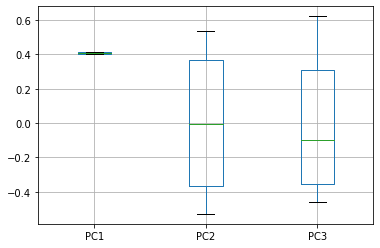

In [ ]:
#Utilizamos Boxplot para graficar las principales variables PC, pudiendo así analizar los valores atípicos:

Graf_principales=pcsComponents_df.iloc[:,:3]

Graf_principales.boxplot()

In [ ]:
def atipicos(atip):

    q1 = np.quantile(pcsComponents_df, 0.25)
    q3 = np.quantile(atip, 0.75)
    med = np.median(atip)
 
    iqr = q3-q1
 
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers = atip[(atip <= lower_bound) |(atip >= upper_bound)]
    return print('Valores atípicos de',atip.name,':\n{}\n'.format(outliers))

atipicos(pcsComponents_df["PC1"])
atipicos(pcsComponents_df["PC2"])
atipicos(pcsComponents_df["PC3"])

Valores atípicos de PC1 :
Series([], Name: PC1, dtype: float64)

Valores atípicos de PC2 :
Series([], Name: PC2, dtype: float64)

Valores atípicos de PC3 :
Series([], Name: PC3, dtype: float64)



In [49]:
pcsSummary_df.iloc[:,:3]

,PC1,PC2,PC3
Desviación estándar,2.330983,0.553115,0.334160
Proporción de la varianza,0.905550,0.050988,0.018610
Proporción acumulada,0.905550,0.956537,0.975147


In [65]:
pcs2 = PCA()
pcs2.fit(preprocessing.scale(principales.iloc[:, 0:3].dropna(axis=0)))

pc_components = (np.arange(pcs2.n_components_) +1)
pc_components

array([1, 2, 3])

In [68]:
cusm = np.cumsum(pcs2.explained_variance_ratio_)
vartio = pcs2.explained_variance_ratio_

[Text(0, 0.5, 'Variance explained'), Text(0.5, 0, 'N-th principal component')]

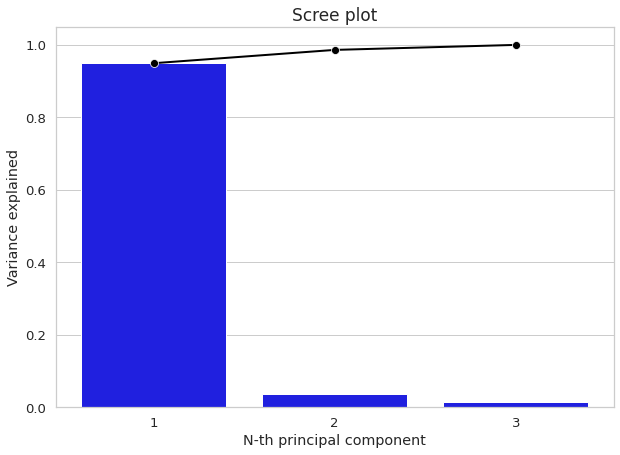

In [69]:
scree = sns.set(style = 'whitegrid', font_scale= 1.2)
fig, ax = plt.subplots(figsize = (10,7))
scree = sns.barplot(x = pc_components, 
                    y= vartio, 
                    color = "blue")
scree = sns.lineplot(x = pc_components - 1,
                     y= cusm,
                     color= 'black',
                     linestyle= '-',
                     linewidth= 2,
                     marker= 'o',
                     markersize=8)
scree.set_title('Scree plot', fontsize = 17)
scree.set(xlabel = 'N-th principal component', ylabel = 'Variance explained')

In [70]:
pcs2.components_.round(2)

array([[ 0.58,  0.58,  0.57],
       [-0.61, -0.16,  0.78],
       [ 0.54, -0.8 ,  0.27]])

## Preguntas finales:

**Responde las siguientes preguntas en una celda de texto en Jupyter Notebook:**


1.   **¿Cuál es el número de componentes mínimo y por qué?**

  * *Después de analizar la información llegamos a la conclución de que requeríamos encontrar la cantidad de componentes que pudieran explicar al menos el 97% del total de la variabilidad. Con este obejtivo pudimos encontrar que el componente mínimo sería de 3.*

2.   **¿Cuál es la variación de los datos que representan esos componentes?**

  * *El primer componente explica el 90.55% de la variabilidad, el segundo explica el 5.09% y el tercer componente explica el 1.86%. En conjunto explican el 97.5% de la variabilidad.*

3. **¿Cuál es la pérdida de información después de realizar PCA?**

  * *Después del PCA estámos perdiendo el 2.5% de la información.*


4. **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

  * *Mayor contribuidor de PC1, X15, es el estado de cuenta en Junio 2005.*
  * *Menor contribuidor de PC1 es X17 que es el estado de cuenta en Abril 2005.*
  *  *Mayor contribuidor de PC2, X12, es el estado de cuenta en Septiembre 2005.*
  * *Menor contribuidor de PC2 es X14 que es el estado de cuenta en Julio 2005.*
  * *Mayor contribuidor de PC3, X14, es  el  estado  de  cuenta  en  Julio 2005.*

  * *Menor contribuidor de PC3 es X16 que es el estado de cuenta en Mayo 2005.*


5. **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

  * *Se recomiendo utilizar un PCA cuando se quiere reducir el número de variables o factores dentro de un conjunto de datos, a fin de hacer más fácil el análisis. Puede usarse cuando existan demasiadas variables a analizar o cuando estas estén correlacionadas.*
  * *El mayor beneficio para el Machine Learning es que permite aglomerar la información que muchas veces es aportada por demasiadas variables, logrando así "exprimirle" hasta la última gota de información a los componentes.*